# Lab 3. Data frame merging, data aggregation and data visualisation


In [1]:
import pandas
pandas.__version__

'2.2.3'

In [2]:
import numpy as np
import pandas as pd

## Task 1
Загрузити файл з даними про споживання енергії “En_In.xls”, який являє собою перелік показників енергозабезпечення та виробництва відновлюваної електроенергії, і ввести їх в DataFrame.

Майте на увазі, що це файл Excel, а не .csv. Також необхідно НЕ ВКЛЮЧАТИ інформацію з нижніх та верхніх рядків файлу даних. 

Перші два стовпці непотрібні, тому їх необхідно виключити із датафрейму, а також поміняти мітки стовпців так, щоб вони були такими:
```python
['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
```

In [3]:
energy_file_path = "datasets/En_In.xls"
еnergy_data = pd.read_excel(io=energy_file_path,
                     engine='xlrd',
                     sheet_name='Energy',
                     skiprows=17,
                     skipfooter=38,
                     usecols='C:F',
                     names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])
еnergy_data

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
...,...,...,...,...
222,Viet Nam,2554,28,45.321520
223,Wallis and Futuna Islands,0,26,0.000000
224,Yemen,344,13,0.000000
225,Zambia,400,26,99.714670


## Task 2
Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж = 1_000_000 ГДж). 

Для всіх країн, у яких відсутні дані (наприклад, дані з "....."), переконайтеся, що це відображається як значення `np.NaN`.

In [4]:
еnergy_data.replace("...", np.nan, inplace=True)
еnergy_data['Energy Supply'] = еnergy_data['Energy Supply'] * 1_000_000
pd.options.display.float_format = '{:.3f}'.format
еnergy_data

/var/folders/04/sfv_qb592px6cksyqky43yc00000gn/T/ipykernel_26379/702565932.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  еnergy_data.replace("...", np.nan, inplace=True)


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000.000,10.000,78.669
1,Albania,102000000.000,35.000,100.000
2,Algeria,1959000000.000,51.000,0.551
3,American Samoa,NaN,NaN,0.641
4,Andorra,9000000.000,121.000,88.696
...,...,...,...,...
222,Viet Nam,2554000000.000,28.000,45.322
223,Wallis and Futuna Islands,0.000,26.000,0.000
224,Yemen,344000000.000,13.000,0.000
225,Zambia,400000000.000,26.000,99.715


## Task 3
Перейменуйте наступний список країн:
``` python
"Republic of Korea": "South Korea",
"United States of America": "United States", 
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"
```

In [5]:
energy_country_replacements = {
    r"^Republic of Korea": "South Korea",
    r"^United States of America": "United States",
    r"^United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    r"^China, Hong Kong Special Administrative Region": "Hong Kong"
}

combined_regex = "|".join(energy_country_replacements.keys())
matching_ids = еnergy_data[еnergy_data['Country'].str.contains(combined_regex, regex=True, na=False)].index
еnergy_data.loc[matching_ids]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
43,"China, Hong Kong Special Administrative Region3",585000000.000,82.000,0.000
164,Republic of Korea,11007000000.000,221.000,2.279
214,United Kingdom of Great Britain and Northern I...,7920000000.000,124.000,10.600
216,United States of America20,90838000000.000,286.000,11.571


In [6]:
еnergy_data['Country'] = еnergy_data['Country'].replace(energy_country_replacements, regex=True)
еnergy_data.loc[matching_ids]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
43,Hong Kong3,585000000.000,82.000,0.000
164,South Korea,11007000000.000,221.000,2.279
214,United Kingdom19,7920000000.000,124.000,10.600
216,United States20,90838000000.000,286.000,11.571


## Task 4
Існує також декілька країн, що мають в назві цифри та/або дужки.

Обов’язково видаліть їх, напр. `Bolivia (Plurinational State of)` повинна бути `Bolivia`, `Switzerland17` повинна бути `Switzerland`.

In [7]:
energy_regex_brackets = r"\s*\(.*\)"
matching_ids_brackets = еnergy_data[еnergy_data['Country'].str.contains(energy_regex_brackets, regex=True, na=False)].index
еnergy_data.loc[matching_ids_brackets]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
24,Bolivia (Plurinational State of),336000000.000,32.000,31.477
70,Falkland Islands (Malvinas),1000000.000,258.000,33.333
98,Iran (Islamic Republic of),9172000000.000,119.000,5.708
133,Micronesia (Federated States of),2000000.000,21.000,2.941
183,Sint Maarten (Dutch part),12000000.000,327.000,0.000
221,Venezuela (Bolivarian Republic of),2871000000.000,95.000,67.835


In [8]:
еnergy_data['Country'] = еnergy_data['Country'].replace(energy_regex_brackets, "", regex=True)
еnergy_data.loc[matching_ids_brackets]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
24,Bolivia,336000000.000,32.000,31.477
70,Falkland Islands,1000000.000,258.000,33.333
98,Iran,9172000000.000,119.000,5.708
133,Micronesia,2000000.000,21.000,2.941
183,Sint Maarten,12000000.000,327.000,0.000
221,Venezuela,2871000000.000,95.000,67.835


In [9]:
energy_regex_numbers = r"\d+$"
matching_ids_numbers = еnergy_data[еnergy_data['Country'].str.contains(energy_regex_numbers, regex=True, na=False)].index
еnergy_data.loc[matching_ids_numbers]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
11,Australia1,5386000000.000,231.000,11.811
42,China2,127191000000.000,93.000,19.755
43,Hong Kong3,585000000.000,82.000,0.000
44,"China, Macao Special Administrative Region4",47000000.000,83.000,0.000
58,Denmark5,725000000.000,129.000,33.538
73,France6,10597000000.000,166.000,17.020
83,Greenland7,9000000.000,166.000,78.125
97,Indonesia8,8754000000.000,35.000,12.189
103,Italy9,6530000000.000,109.000,33.667
105,Japan10,18984000000.000,149.000,10.233


In [10]:
еnergy_data['Country'] = еnergy_data['Country'].replace(energy_regex_numbers, "", regex=True)
еnergy_data.loc[matching_ids_numbers]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
11,Australia,5386000000.000,231.000,11.811
42,China,127191000000.000,93.000,19.755
43,Hong Kong,585000000.000,82.000,0.000
44,"China, Macao Special Administrative Region",47000000.000,83.000,0.000
58,Denmark,725000000.000,129.000,33.538
73,France,10597000000.000,166.000,17.020
83,Greenland,9000000.000,166.000,78.125
97,Indonesia,8754000000.000,35.000,12.189
103,Italy,6530000000.000,109.000,33.667
105,Japan,18984000000.000,149.000,10.233


## Task 5
Далі, завантажте дані про ВВП з файлу "gpd.csv", що містить дані Світового банку про ВВП країн від 1960 до 2015 року.

Обов’язково не включайте заголовок до датафрейму і перейменуйте наступний список країн:

```python
"Korea, Rep.": "South Korea",
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"
```

In [11]:
gpd_file_path = "datasets/gpd.csv"
gdp_data = pd.read_csv(filepath_or_buffer=gpd_file_path,
                     engine='python',
                     skiprows=4,
                     usecols=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 
                              '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'])
gdp_data.rename(columns={'Country Name': 'Country'}, inplace=True)
gdp_data

,Country,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,2467703910.615,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4018195653.510,4021331428.401,3675727910.507,3535389132.602,3346317328.525,3185604581.520,3129537611.886,3127549907.584,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,10305228125.139,11721187594.205,12144482858.180,14697331940.646,15936800636.249,16911126453.228,19352203805.629,19731337260.638,19990317160.676,20294152243.007
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,55811028114.648,68420444001.499,77874196512.184,79753199398.140,82470913120.731,85702615836.440,90120963241.219,96261432368.264,100886286610.958,103910558934.020
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,9771760095.126,10348293941.585,11127520474.298,11500292411.174,11926953258.916,12231090567.667,12404772053.501,12542465022.373,12793314322.820,13120823169.485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,"Yemen, Rep.",YEM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,26725653162.688,27617869836.712,28726558529.023,29914355173.579,30906753495.150,26243421035.825,26891601653.747,28009137429.746,NaN,NaN
260,South Africa,ZAF,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,340285160027.947,358526057738.423,369966781589.995,364276362720.086,375349442837.240,387407362601.250,396007124238.282,404768205399.940,411036853168.561,416311671520.861
261,"Congo, Dem. Rep.",COD,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,16508944144.718,17542316525.547,18634483660.300,19166509369.447,20523285374.187,21932132984.367,23502004276.807,25500497989.972,27787759925.442,29709613590.184
262,Zambia,ZMB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,14405693544.016,15608919909.946,16822341081.070,18373419545.142,20265552104.396,21403581063.296,23024380970.417,24205950559.401,25422273004.669,26241270767.756


In [12]:
gdp_country_replacements = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}

combined_regex_gdp = "|".join(gdp_country_replacements.keys())
gdp_matching_ids = gdp_data[gdp_data['Country'].str.contains(combined_regex_gdp, regex=True, na=False)].index
gdp_data.loc[gdp_matching_ids]

,Country,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
93,"Hong Kong SAR, China",HKG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,201916372094.710,214969758150.611,219544022644.222,214145185396.967,228637697575.040,239645861296.690,243720566257.359,251208086226.166,257775655510.280,263860579574.348
109,"Iran, Islamic Rep.",IRN,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,389552313541.270,425064554419.087,428990857822.095,438920754763.986,467790215915.476,485330901134.448,453256899727.832,444592553889.771,463902735245.890,NaN
123,"Korea, Rep.",KOR,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,941019882149.125,992431619676.197,1020509638539.710,1027729932849.170,1094499338702.720,1134795571930.640,1160809426196.790,1194429021591.570,1234340240503.490,1266580410309.110


In [13]:
gdp_data['Country'] = gdp_data['Country'].replace(gdp_country_replacements, regex=True)
gdp_data.loc[gdp_matching_ids]

,Country,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
93,Hong Kong,HKG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,201916372094.710,214969758150.611,219544022644.222,214145185396.967,228637697575.040,239645861296.690,243720566257.359,251208086226.166,257775655510.280,263860579574.348
109,Iran,IRN,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,389552313541.270,425064554419.087,428990857822.095,438920754763.986,467790215915.476,485330901134.448,453256899727.832,444592553889.771,463902735245.890,NaN
123,South Korea,KOR,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,941019882149.125,992431619676.197,1020509638539.710,1027729932849.170,1094499338702.720,1134795571930.640,1160809426196.790,1194429021591.570,1234340240503.490,1266580410309.110


## Task 6
Завантажте дані з файлу "scimagojr.xlsx", який класифікує країни на основі їхніх публікацій в журналах у галузі енергетичного машинобудування та енергетичних технологій.

In [14]:
scimagojr_file_path = "datasets/scimagojr.xlsx"
scimagojr_data = pd.read_excel(io=scimagojr_file_path,
                     engine='openpyxl',
                     sheet_name=0)
scimagojr_data

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.700,138
1,2,United States,96661,94747,792274,265436,8.200,230
2,3,Japan,30504,30287,223024,61554,7.310,134
3,4,United Kingdom,20944,20357,206091,37874,9.840,139
4,5,Russian Federation,18534,18301,34266,12422,1.850,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.000,0
187,188,Christmas Island,1,1,0,0,0.000,0
188,189,Reunion,1,1,2,1,2.000,1
189,190,Saint Lucia,1,1,0,0,0.000,0


## Task 7
Приєднайте три набори даних із завдань 1-6 до нового набору даних (використовуючи перетин назв країн).
- Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15)
- Індексом цього DataFrame повинна бути назва країни, а стовпцями мають бути:
```python
['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 
 'Energy Supply', 'Energy Supply per Capita', '% Renewable', 
 '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
```
Ви повинні отримати DataFrame з 15 рядками та 20 стовпцями.

In [15]:
# Вибір 15 найкращих країн за рейтингом Scimagojr
top_15_scimagojr_countries = scimagojr_data.loc[scimagojr_data['Rank'] <= 15].set_index('Country')
top_15_scimagojr_countries

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,127050,126767,597237,411683,4.700,138
United States,2,96661,94747,792274,265436,8.200,230
Japan,3,30504,30287,223024,61554,7.310,134
United Kingdom,4,20944,20357,206091,37874,9.840,139
Russian Federation,5,18534,18301,34266,12422,1.850,57
Canada,6,17899,17620,215003,40930,12.010,149
Germany,7,17027,16831,140566,27426,8.260,126
India,8,15005,14841,128763,37209,8.580,115
France,9,13153,12973,130632,28601,9.930,114


In [16]:
# Об'єднання даних з рейтингом Scimagojr та енергетичними даними за перетином назв країн
merged_data = top_15_scimagojr_countries.merge(еnergy_data, on='Country', how='left')
merged_data

,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable
0,China,1,127050,126767,597237,411683,4.700,138,127191000000.000,93.000,19.755
1,United States,2,96661,94747,792274,265436,8.200,230,90838000000.000,286.000,11.571
2,Japan,3,30504,30287,223024,61554,7.310,134,18984000000.000,149.000,10.233
3,United Kingdom,4,20944,20357,206091,37874,9.840,139,7920000000.000,124.000,10.600
4,Russian Federation,5,18534,18301,34266,12422,1.850,57,30709000000.000,214.000,17.289
5,Canada,6,17899,17620,215003,40930,12.010,149,10431000000.000,296.000,61.945
6,Germany,7,17027,16831,140566,27426,8.260,126,13261000000.000,165.000,17.902
7,India,8,15005,14841,128763,37209,8.580,115,33195000000.000,26.000,14.969
8,France,9,13153,12973,130632,28601,9.930,114,10597000000.000,166.000,17.020
9,South Korea,10,11983,11923,114675,22595,9.570,104,11007000000.000,221.000,2.279


In [17]:
# Об'єднання з даними про ВВП за перетином назв країн
data = merged_data.merge(gdp_data, on='Country', how='left')
data.set_index('Country', inplace=True)
data_columns = [
    'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 
    'Energy Supply', 'Energy Supply per Capita', '% Renewable', 
    '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'
]
data = data.loc[:, data_columns]
data

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.700,138,127191000000.000,93.000,19.755,3992331462570.890,4559041383517.930,4997775145605.960,5459247267275.140,6039658508485.590,6612490294273.650,7124977970399.610,7672447738017.420,8230120617793.520,8797998940421.279
United States,2,96661,94747,792274,265436,8.200,230,90838000000.000,286.000,11.571,14792303791800.000,15055395304800.000,15011490541400.000,14594842181900.000,14964372000000.000,15204019634600.000,15542161722300.000,15773666098800.000,16156618476000.000,16548573278300.000
Japan,3,30504,30287,223024,61554,7.310,134,18984000000.000,149.000,10.233,5496541517363.310,5617035943770.730,5558526873313.820,5251308399909.320,5498717815809.770,5473738114222.050,5569101602926.180,5644658523313.420,5642884448582.190,5669563143140.970
United Kingdom,4,20944,20357,206091,37874,9.840,139,7920000000.000,124.000,10.600,2419630700401.730,2482203235475.900,2470614405284.300,2367047611711.990,2403504326328.800,2450911011124.850,2479808627472.190,2533370110012.360,2605643189894.930,2666333396477.130
Russian Federation,5,18534,18301,34266,12422,1.850,57,30709000000.000,214.000,17.289,1385792607182.580,1504071117741.300,1583004071092.110,1459199142720.260,1524917468442.010,1589942641764.290,1645875899596.270,1666934123163.160,1678708855070.860,1616148858033.770
Canada,6,17899,17620,215003,40930,12.010,149,10431000000.000,296.000,61.945,1564468853329.450,1596739898466.320,1612713061250.240,1565144676082.310,1613406134731.120,1664086754804.890,1693132927878.080,1730687770724.130,1773485821199.770,1792608764608.810
Germany,7,17027,16831,140566,27426,8.260,126,13261000000.000,165.000,17.902,3332890754966.890,3441560834437.090,3478809377483.440,3283339933774.830,3417298013245.030,3542371125827.810,3556723774834.440,3567317390728.480,3624386278145.700,3685555907284.770
India,8,15005,14841,128763,37209,8.580,115,33195000000.000,26.000,14.969,1265894322131.090,1374865195244.500,1428360609657.800,1549482541544.700,1708458876829.920,1821872415623.620,1924235460945.250,2051981849791.690,2200616575310.970,2367206118959.060
France,9,13153,12973,130632,28601,9.930,114,10597000000.000,166.000,17.020,2607839735099.340,2669423841059.600,2674637086092.710,2595966887417.220,2646994701986.750,2702031788079.470,2706968211920.530,2722566887417.220,2729631788079.470,2761185430463.580


## Task 8

Створіть функцію, щоб визначити середній ВВП країн за останні 10 років.

Ця функція повинна повертати об’єкт Series з 15 країнами та їх середній ВВП, відсортований за спаданням.

In [18]:
# Функція для підрахунку середнього ВВП за останні 10 років для кожної країни
# Роки з GDP даними
columns_with_gdp_by_year = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

def calculate_avg_gdp():    
    # Підрахунок середнього ВВП по колонках за роки з GDP
    avg_gdp_calculations = data[columns_with_gdp_by_year].mean(axis=1)
    
    # Сортування по спаданню та перетворення в Series з назвою "avgGDP"
    sorted_avg_gdp_calculations = avg_gdp_calculations.sort_values(ascending=False)
    sorted_avg_gdp_calculations.name = 'avgGDP'
    
    return sorted_avg_gdp_calculations


avg_gdp = calculate_avg_gdp()
avg_gdp

Country
United States        15364344302990.000
China                 6348608932836.100
Japan                 5542207638235.176
Germany               3493025339072.848
France                2681724635761.589
United Kingdom        2487906661418.417
Brazil                2189794143774.905
Italy                 2120175089933.776
India                 1769297396603.860
Canada                1660647466307.512
Russian Federation    1565459478480.661
Spain                 1418078278145.694
Australia             1164042729991.427
South Korea           1106714508244.852
Iran                   444155754051.095
Name: avgGDP, dtype: float64

## Task 9

Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП.4

Ця функція повинна повертати кортеж із назвою країни та значенням, на яке змінився ВВП.

In [19]:
# Функція для обчислення зміни ВВП за останні 10 років для країни з 5-м середнім ВВП
def calculate_gdp_trends():    
    # Підрахунок середнього ВВП для кожної країни та вибір 5-ї країни
    fifth_avg_gdp_country = calculate_avg_gdp().index[4]
    
    # Обчислення зміни ВВП для вибраної країни
    gdp_trend = data.loc[fifth_avg_gdp_country, '2015'] - data.loc[fifth_avg_gdp_country, '2006']
    
    # Повернення результату як кортеж
    return (fifth_avg_gdp_country, gdp_trend.item())


gdp_trends_over_last_10_years_for_5th_avg_gdp_country = calculate_gdp_trends()
gdp_trends_over_last_10_years_for_5th_avg_gdp_country

('France', 153345695364.24023)

## Task 10

Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП.4

Ця функція повинна повертати кортеж із назвою країни та значенням, на яке змінився ВВП.

In [20]:
# Функція для знаходження країни з найбільшим відсотком поновлюваних джерел енергії
def max_percentage_renewable():
    # Знаходимо країну з максимальним % Renewable та її значення %
    return (data['% Renewable'].idxmax(), data['% Renewable'].max().item())


max_percentage_renewable_country = max_percentage_renewable()
max_percentage_renewable_country

('Brazil', 69.64803)

## Task 11

Створіть стовпець, в якому оцінюється чисельність населення. 

Для пошуку оцінки використовуйте значення енергопостачання (Energy Supply) та енергопостачання на душу населення (Energy Supply per capita). 

Яка країна є шостою за цією оцінкою?

Ця функція повинна повертати кортеж із назвою країни та населенням

In [21]:
# Функція для оцінки чисельності населення та знаходження країни з 6-ю за величиною чисельністю населення
def find_6th_estimated_population_country():
    # Оцінка населення
    data['Estimated Population'] = data['Energy Supply'] / data['Energy Supply per Capita']
    
    # Сортування за чисельністю населення у спадаючому порядку
    sorted_population = data['Estimated Population'].sort_values(ascending=False)
    
    # Знаходження 6-ї країни за чисельністю населення
    return (sorted_population.index[5], sorted_population.iloc[5].item())


sixth_estimated_population_country = find_6th_estimated_population_country()
sixth_estimated_population_country

('Japan', 127409395.97315437)

In [22]:
data[['Energy Supply', 'Energy Supply per Capita', 'Estimated Population']]

,Energy Supply,Energy Supply per Capita,Estimated Population
Country,,,
China,127191000000.000,93.000,1367645161.290
United States,90838000000.000,286.000,317615384.615
Japan,18984000000.000,149.000,127409395.973
United Kingdom,7920000000.000,124.000,63870967.742
Russian Federation,30709000000.000,214.000,143500000.000
Canada,10431000000.000,296.000,35239864.865
Germany,13261000000.000,165.000,80369696.970
India,33195000000.000,26.000,1276730769.231
France,10597000000.000,166.000,63837349.398


## Task 12

Створіть стовпець, в якому оцінюється кількість цитованих документів на одну особу. 

Який взаємозв'язок між кількістю цитованих документів на душу населення та енергозабезпеченням на душу населення? 

Використовуйте метод `.corr()` (кореляція Пірсона).

Ця функція повинна повертати одне число

In [23]:
# Функція для розрахунку коефіцієнта кореляції Пірсона між кількістю цитованих документів на душу та енергозабезпеченням на душу населення
def calculate_docs_and_energy_supply_correlation():
    # Оцінка кількості цитованих документів на душу населення
    data['Citable Docs per Capita'] = (data['Citable documents'] / data['Estimated Population'])
    
    # Розрахунок кореляції Пірсона між 'Citable docs per Capita' і 'Energy Supply per Capita'
    return data['Citable Docs per Capita'].corr(data['Energy Supply per Capita']).item()


docs_and_energy_supply_correlation = calculate_docs_and_energy_supply_correlation()
docs_and_energy_supply_correlation

0.7940010435442945

Оскільки результат близький до +1, це означає сильну позитивну кореляцію між кількістю цитованих документів на душу та енергозабезпеченням на душу населення, тобто в країнах з вищим енергозабезпеченням на душу населення також спостерігається більша кількість цитованих документів на душу.

In [24]:
pd.options.display.float_format = '{:.8f}'.format
data[['Citable documents', 'Estimated Population', 'Citable Docs per Capita']]

,Citable documents,Estimated Population,Citable Docs per Capita
Country,,,
China,126767,1367645161.29032254,0.00009269
United States,94747,317615384.61538464,0.00029831
Japan,30287,127409395.97315437,0.00023771
United Kingdom,20357,63870967.74193548,0.00031872
Russian Federation,18301,143500000.00000000,0.00012753
Canada,17620,35239864.86486486,0.00050000
Germany,16831,80369696.96969697,0.00020942
India,14841,1276730769.23076916,0.00001162
France,12973,63837349.39759036,0.00020322


## Task 13

Створіть новий стовпчик в який занесіть 1, якщо значення % відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для всіх країн, і 0, якщо значення (% Renewable) нижче медіани.

Ця функція повинна повертати Series, індексом якого є назва країни, відсортована у порядку зростання Rank

In [25]:
pd.options.display.float_format = '{:.3f}'.format

# Функція для створення нового стовпця на основі медіани % Renewable
def calculate_renewable_median_flags():
    # Розрахунок медіани для % Renewable
    renewable_energy_percentage_median = data['% Renewable'].median()
    
    # Створення нового прапорцевого стовпця: 1, якщо % Renewable >= медіани, інакше 0
    data['Renewable Median Flag'] = (data['% Renewable'] >= renewable_energy_percentage_median).astype(int)
    
    # Сортування за Rank і повернення результату як Series з індексом Country
    result_series = data['Renewable Median Flag']
    
    return result_series


renewable_median_flags = calculate_renewable_median_flags()
renewable_median_flags

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Median Flag, dtype: int64

In [26]:
print(f"Renewable Median = {data['% Renewable'].median()}")
data[['% Renewable', 'Renewable Median Flag']]

Renewable Median = 17.02028


,% Renewable,Renewable Median Flag
Country,,
China,19.755,1
United States,11.571,0
Japan,10.233,0
United Kingdom,10.600,0
Russian Federation,17.289,1
Canada,61.945,1
Germany,17.902,1
India,14.969,0
France,17.020,1


## Task 14

Використайте наступний словник, щоб згрупувати країни за континентами, потім створіть DataFrame, який відображає розмір вибірки (кількість країн на кожному континенті), а також суму, середнє та стандартне відхилення для оцінки кількості населення для кожної країни.
```python
ContinentDict = {'China':'Asia',
                 'United States':'North America',
                 'Japan':'Asia',
                 'United Kingdom':'Europe',
                 'Russian Federation':'Europe',
                 'Canada':'North America',
                 'Germany':'Europe',
                 'India':'Asia',
                 'France':'Europe',
                 'South Korea':'Asia',
                 'Italy':'Europe',
                 'Spain':'Europe',
                 'Iran':'Asia',
                 'Australia':'Australia',
                 'Brazil':'South America'}
```

Ця функція повинна повертати DataFrame з індексом, що має ім’я Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` та стовпцями `['size', 'sum', 'mean', 'std ']`.

In [27]:
# Словник для групування країн за континентами
ContinentDict = {
        'China':'Asia', 
        'United States':'North America', 
        'Japan':'Asia',
        'United Kingdom':'Europe', 
        'Russian Federation':'Europe',
        'Canada':'North America', 
        'Germany':'Europe', 
        'India':'Asia',
        'France':'Europe', 
        'South Korea':'Asia', 
        'Italy':'Europe',
        'Spain':'Europe', 
        'Iran':'Asia', 
        'Australia':'Australia', 
        'Brazil':'South America'
    }

# Функція для групування країн за континентами та обчислення статистики для населення без використання ітерацій
def calculate_stats_per_continents():
    # Додавання колонки Continent з використанням loc для уникнення конфлікту колонок
    data['Continent'] = data.index.map(ContinentDict)

    # Групування за континентом і обчислення статистики
    continent_stats = data.groupby('Continent')['Estimated Population'].agg(['size', 'sum', 'mean', 'std'])
    
    return continent_stats


stats_per_continents = calculate_stats_per_continents()
stats_per_continents

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.611,579733277.322,679097888.366
Australia,1,23316017.316,23316017.316,NaN
Europe,6,457929667.216,76321611.203,34647667.066
North America,2,352855249.480,176427624.740,199669644.857
South America,1,205915254.237,205915254.237,NaN


# Task 15

Створіть бульбашкову діаграму, що відображає залежність % поновлюван их джерел від рейтингу країни (% Renewable vs. Rank). 

Розмір бульбашки відповідає ВВП країн 2015 року, а колір відповідає континенту.

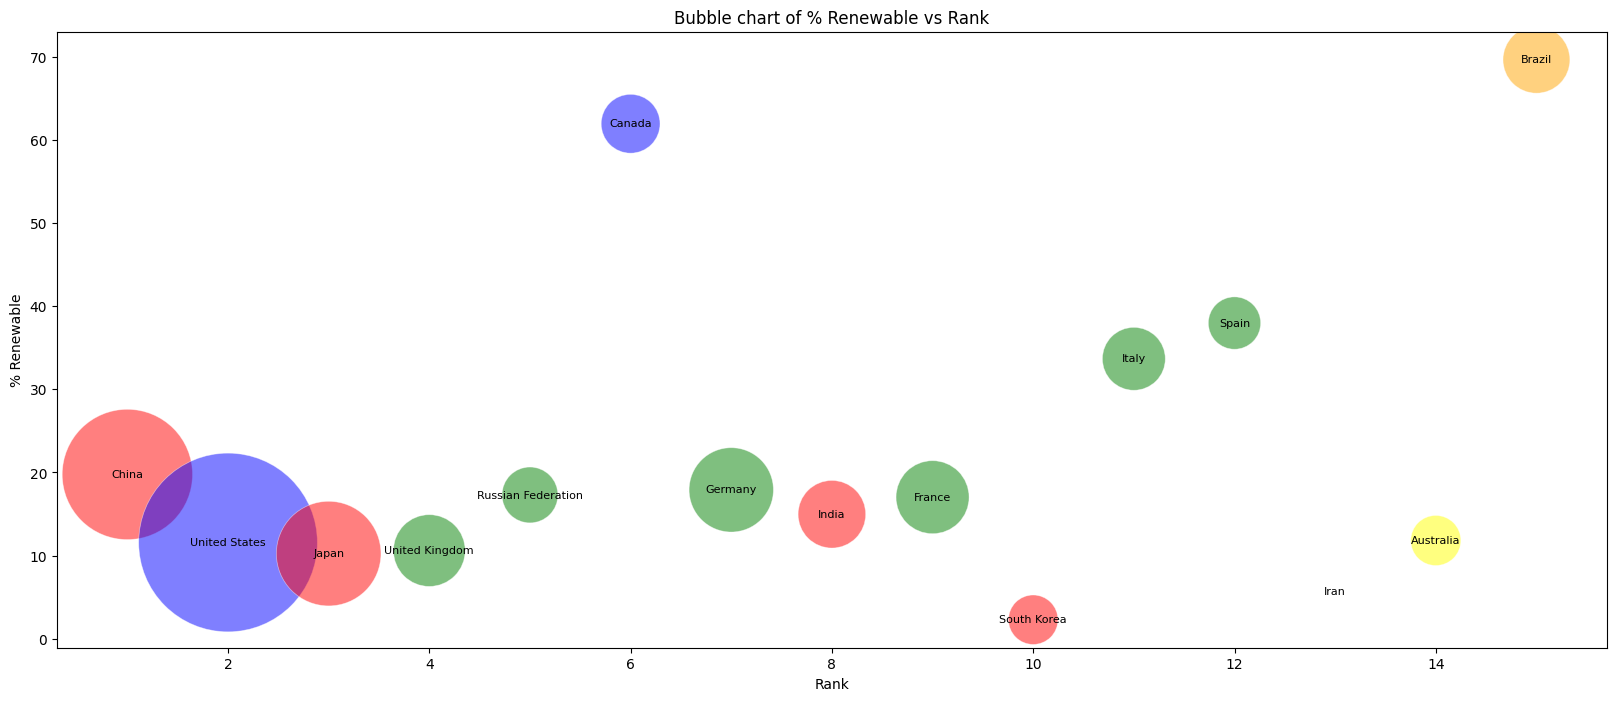

In [29]:
import matplotlib.pyplot as plt

# Відповідність континентів кольорам
colors = {
    'Asia': 'red', 
    'North America': 'blue', 
    'Europe': 'green',
    'Australia': 'yellow', 
    'South America': 'orange'
}

# Додавання кольорів для кожного континенту
data['Continent'] = data.index.map(ContinentDict)
data['Color'] = data['Continent'].map(colors)

# Побудова бульбашкової діаграми
plt.figure(figsize=(20, 8))
plt.scatter(data['Rank'], data['% Renewable'],
            s=data['2015'] / 1e9,  # Розмір бульбашки пропорційний до ВВП 2015
            c=data['Color'], alpha=0.5, edgecolors="w", linewidth=0.5)

# Додавання підписів до кожної бульбашки
data.apply(lambda row: plt.text(row['Rank'], row['% Renewable'], 
                                row.name, ha='center', va='center', fontsize=8),
           axis=1)

# Заголовок та підписи осей
plt.title("Bubble chart of % Renewable vs Rank")
plt.xlabel("Rank")
plt.ylabel("% Renewable")

plt.show()